#Markowitz portfolio optimization

We will introduce the Markowitz model in portfolio optimization and discuss its model with different parameters, graphs and libraries, we also make a variant of the classic optimization that is used for this model  by using the standard deviation instead of the variance


##The mean–variance mode

Consider an investor who wishes to allocate capital among $N$
 securities at time $t=0$
 and hold them over a single period of time until $t=h$
. We denote $ p_{0,i}$
 the (known) price of security
 at the beginning of the investment period $h$ and $P_{h,i}$
 the (random) price of security
 at the end of the investment period $t=h$
. The rate of return of security $i$
 over period $h$
 is then modeled by the random variable $R_i = P_{h,i}/p_{0,i}-1$
, and its expected value is denoted by $\mu_i = \mathbb{E}(R_i)$
. The risk-averse investor seeks to maximize the return of the investment, while trying to keep the investment risk, i. e., the uncertainty of the future security returns $R_i$
 on an acceptable low level.

The part of investment risk called specific risk (the risk associated with each individual security) can be reduced (for a fixed expected rate of return) through diversification, which means the selection of multiple unrelated securities into a portfolio.Modern Portfolio Theory formalized this process by using variance as a measure of portfolio risk, and constructing a optimization problem.

Thus we make the investment decision at time
 by specifying the
-dimensional decision vector
 called portfolio, where
 is the fraction of funds invested into security
. We can then express the random portfolio return as
, where
 is the vector of security returns. The optimal
 is given based on the following inputs of the portfolio optimization problem:


*   The expected portfolio return: $\mu_\mathbf{x} = \mathbb{E}(R_\mathbf{x}) = \mathbf{x}^\mathsf{T}\mathbb{E}(R) = \mathbf{x}^\mathsf{T}\mu.$
*   The portfolio variance: $\sigma^2_\mathbf{x} = \mathrm{Var}(R_\mathbf{x}) = \sum_i\mathrm{Cov}(R_i, R_j)x_ix_j = \mathbf{x}^\mathsf{T}\Sigma\mathbf{x}.$







##Solution of the mean–variance model

To be able to solve the portfolio optimization problem, we have to assume that the investor knows the value of the expected return vector and covariance matrix . In practice it is only possible to have estimates, which we will denote by and respectively. Usually, the risks are associated with changes in the market that makes the set of assets lose its value, and therefore investors lose part of their budget

In the simplest form of the QUBO problem only risky securities are considered. Also the portfolio is fully invested with no initial holdings, implying the linear equality constraint , where denotes a vector of ones.
$\sum_i x_i = \mathbf{1}^\mathsf{T}\mathbf{x} = 1$

We can formulate this portfolio optimization problem in three equivalent ways:


1.   Minimize the portfolio risk, with the constraint expressing a lower bound on the portfolio return: $\begin{split}\begin{array}{lrcl}
\mbox{maximize}     & \sum^\mathsf{T}\mathbf{x}                &          &\\
\mbox{subject to}   & \mathbf{x}^\mathsf{T}\sum\mathbf{x}      & \leq     & \gamma^2,\\
                    & \mathbf{1}^\mathsf{T}\mathbf{x}                & =        & 1.\\
\end{array}\end{split}$
2.  Maximize the expected portfolio return, with the constraint expressing an upper bound on the portfolio risk: \begin{split}\begin{array}{lrcl}
\mbox{maximize}     & \sum^\mathsf{T}\mathbf{x}                &          &\\
\mbox{subject to}   & \mathbf{x}^\mathsf{T}\sum\mathbf{x}      & \leq     & \gamma^2,\\
                    & \mathbf{1}^\mathsf{T}\mathbf{x}                & =        & 1.\\
\end{array}\end{split}


3.   Maximize the utility function of the investor: \begin{split}\begin{array}{lrcl}
\mbox{maximize}     & \sum^\mathsf{T}\mathbf{x} - \frac{\delta}{2} \mathbf{x}^\mathsf{T}\sum\mathbf{x}  &        &\\
\mbox{subject to}   & \mathbf{1}^\mathsf{T}\mathbf{x} & =         & 1.\\
\end{array}\end{split}
4.   We get a variant of this optimization problem by using the standard deviation instead of the variance: \begin{split}\begin{array}{lrcl}
\mbox{maximize}              & \sum^\mathsf{T}\mathbf{x} - \tilde{\delta} \sqrt{\mathbf{x}^\mathsf{T}\sum\mathbf{x}}  &           & \\
\mbox{subject to}            & \mathbf{1}^\mathsf{T}\mathbf{x}                                                                    & =         & 1.\\
\end{array}\end{split}





this problem is known to be an NP-hard problem and its objective function using variance is given by

<div class="alert alert-block alert-success">
$$\max_{x} : \mu^{T} x-q x^{T}\Sigma x$$
</div>
and for standard deviation its objective function is given by
<div class="alert alert-block alert-success">
$$\max_{x} : \mu^{T} x-q \sqrt(x^{T}\Sigma x)$$
</div>

Subject to:
    $$\sum_{i=1}^{N} c_i x_i = B$$

where:
- $N$ represents the number of assets
- $x \in\{0,1\}^{N}$ denotes the vector of binary decision variables, which indicate which assets to pick ( $\left.x[i]=1\right)$ and which not to pick $(x[i]=0)$,
- $\mu \in R^{n}$ defines the expected returns for the assets,
- $\Sigma \in R^{n \times n}$ specifies the covariances between the assets,
- $q>0$ controls the risk aversion of the decision maker,
- $c_i$ is the cost of investing in the ith asset
- $B$ denotes the budget, i.e., the total investment..

#Lets hands on code!!
first we will install our libraries

In [ ]:
!pip install openqaoa-qiskit
!pip install cplex --upgrade
!pip install docplex
!pip install qiskit



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.4/280.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 633.5/633.5 kB 38.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.4/808.4 kB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 86.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 18.7 MB/

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 MB 13.1 MB/s eta 0:00:00


In [ ]:
!pip install matplotlib

In [ ]:
%matplotlib inline

# Import external libraries to present an manipulate the data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import docplex model to generate the problem to optimize
from docplex.mp.model import Model

# Import the libraries needed to employ the QAOA quantum algorithm using OpenQAOA
from openqaoa import QAOA

# method to covnert a docplex model to a qubo problem
from openqaoa.problems.converters import FromDocplex2IsingModel
from openqaoa.backends import create_device

# method to find the corrects states for the QAOA boject
from openqaoa.utilities import ground_state_hamiltonian

#Generating the data
for get more simply problem, we used a random function to generate the predictions the expected return for 20 assets during 30 days. Additionally, the cost of investment in each assets (c<sub>i</sub>) is set to 1.

In [ ]:
# For the case of reproducibility this seed is configured
np.random.seed(1)

# Init variables to geretate the data
# consider the number of the assets and the numbero f days
num_assets = 20
num_days = 30

# Risk aversion
q = 0.01

# The limit of the budget, is consider as constraint
Budget = 5

# Cost of buying the different assets c_i
c = num_assets * [1]
# Creating a random history of the forcasting for the expected return
hist_exp = (1 - 2 * np.random.rand(num_assets)).reshape(-1,1) * (np.array([np.arange(num_days) for i in range(num_assets)]) + np.random.randint(10)) + (1 - 2 * np.random.rand(num_assets,  num_days))

# Mean expected return over the  num_days value
mu = hist_exp.mean(axis=1)
# Covariance matrix (Sigma) for the risk term of the cost function
sigma = np.cov(hist_exp)

Text(0.5, 1.0, 'Covariance Matrix $\\Sigma$ associated to the risk')

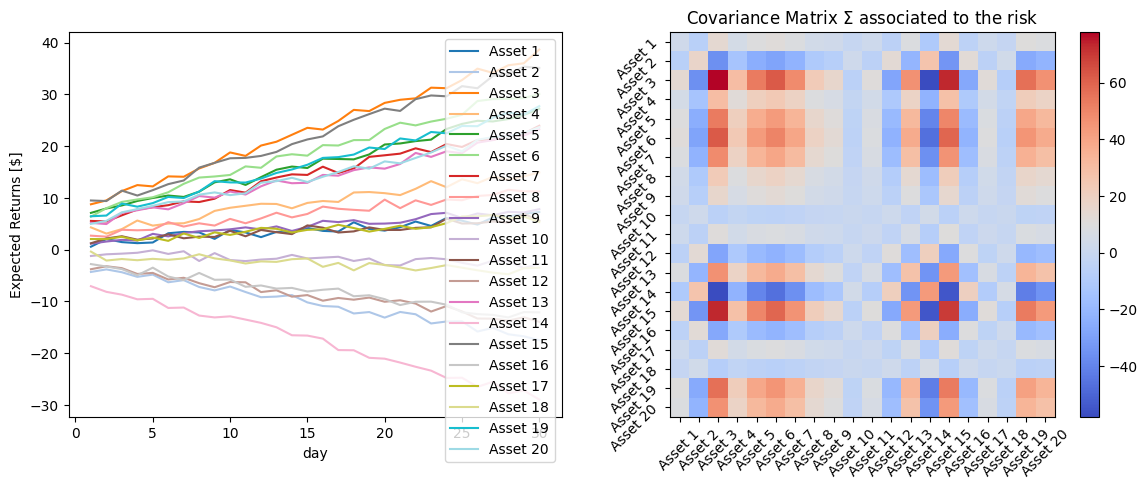

In [ ]:
# Plot the stock's time series
fig, ax = plt.subplots(1, 2, figsize=(14,5))
colors = plt.cm.tab20(range(20))
for i in range(num_assets):
    ax[0].plot(range(1, num_days+1), hist_exp[i], color=colors[i])
ax[0].set_xlabel("day")
ax[0].set_ylabel("Expected Returns [$]")
ax[0].legend([f"Asset {i}" for i in range(1, num_assets+1)])
im = ax[1].imshow(sigma, cmap="coolwarm")
fig.colorbar(im)

# Plot the covariance matrix
ax[1].set_yticks(range(num_assets))
ax[1].set_xticks(range(num_assets))
ax[1].set_xticklabels([f"Asset {i}" for i in range(1, num_assets+1)], rotation=45)
ax[1].set_yticklabels([f"Asset {i}" for i in range(1, num_assets+1)], rotation=45)
ax[1].set_title(r"Covariance Matrix $\Sigma$ associated to the risk")

#Obtaining the Quadratic problem (QUBO) from DOCPLEX

In [ ]:
#Specific the Model and put a name
mdl = Model('Portfolio Optimization')
from math import sqrt

In [ ]:
#Start the docplex model with Model("name of the model")
mdl = Model('Portfolio Optimization')

# Consider the number of variables as num_assets,
# and binary set of variables that represent the stocks
# x vector in numpy array for matrix multiplication
x = np.array(mdl.binary_var_list(num_assets, name="asset"))

#Specific the objective of the
# portfolio optimization function
objective_function = mu @ x - x.T @ sigma @ x

# For this problem it aims to maximize the profit
# of those assets minimizing the risk of the investment
mdl.maximize(objective_function)

# Budget constraint
mdl.add_constraint(c @ x == Budget, ctname='budget')

# Printing the docplex model
mdl.prettyprint()

// This file has been generated by DOcplex
// model name is: Portfolio Optimization
// var contrainer section
dvar bool asset[20];

maximize
 3.885180 asset_0 - 10.343083 asset_1 + 23.372171 asset_2 + 9.280443 asset_3
 + 16.816607 asset_4 + 19.089249 asset_5 + 14.645514 asset_6
 + 7.152104 asset_7 + 4.679887 asset_8 - 1.772702 asset_9 + 3.723948 asset_10
 - 8.738834 asset_11 + 13.954828 asset_12 - 17.724217 asset_13
 + 22.160371 asset_14 - 8.049975 asset_15 + 3.940631 asset_16
 - 2.696882 asset_17 + 16.809209 asset_18 + 14.317557 asset_19 [
 - 3.018927 asset_0^2 + 12.923459 asset_0*asset_1 - 28.187938 asset_0*asset_2
 - 10.786620 asset_0*asset_3 - 19.269819 asset_0*asset_4
 - 22.690682 asset_0*asset_5 - 17.492662 asset_0*asset_6
 - 8.505347 asset_0*asset_7 - 5.974669 asset_0*asset_8
 + 2.126292 asset_0*asset_9 - 4.256571 asset_0*asset_10
 + 10.011086 asset_0*asset_11 - 16.995093 asset_0*asset_12
 + 21.154407 asset_0*asset_13 - 26.692992 asset_0*asset_14
 + 9.766123 asset_0*asset_15 - 4

#Solving using OPENQAOA
The class FromDocplex2IsingModel from OpenQAOA converts the docplex representation of the problem to its QUBO representation in Ising encoding (-1, 1). From there, it is only required setting the QAOA model and solve the QUBO.

In [ ]:
# Converting the Docplex model into its qubo representation
qubo = FromDocplex2IsingModel(mdl)
## Docplex QUBO model
#mdl_qubo = qubo.qubo_docplex
# Ising encoding of the QUBO problem
ising_encoding = qubo.ising_model

# Print in a df the ising encoding (we need to remove keys: 'problem_instance' and 'metadata'))
ising_encoding_dict = ising_encoding.asdict(exclude_keys=['problem_instance', 'metadata'])
pd.DataFrame(ising_encoding_dict)

,terms,weights,constant,n
0,"[0, 1]",3572.021677,215109.366118,20
1,"[0, 2]",3582.299526,215109.366118,20
2,"[0, 3]",3577.949197,215109.366118,20
3,"[0, 4]",3580.069997,215109.366118,20
4,"[0, 5]",3580.925212,215109.366118,20
...,...,...,...,...
205,[15],-35686.404202,215109.366118,20
206,[16],-35781.838680,215109.366118,20
207,[17],-35733.225877,215109.366118,20
208,[18],-35891.995639,215109.366118,20


In [ ]:
#Specific local device usign qiskit backend
device = create_device("local", 'qiskit.qasm_simulator')
qaoa = QAOA(device)
#Indicate the properties to the QAOA quantum algorithm,shots,seed
qaoa.set_backend_properties(n_shots=130, seed_simulator=1) ##we not use 1024 because its so extend operation
#check the p value and the variational init params
qaoa.set_circuit_properties(p=2, init_type="custom", variational_params_dict={"betas":2*[0.01*np.pi],"gammas":2*[0.01*np.pi]})

#Indicate the ising e ncoding model from docplex
qaoa.compile(ising_encoding)

#Optimize the quantum algorithm
qaoa.optimize()
pd.DataFrame(qaoa.result.lowest_cost_bitstrings(5))

,solutions_bitstrings,bitstrings_energies,probabilities
0,01000100000001010100,77.547180,0.007692
1,00000100000101100001,91.096487,0.007692
2,00101000000101100000,144.839121,0.007692
3,01000000000001011100,212.044677,0.007692
4,01000000010001010100,275.123157,0.007692


In [ ]:
# To find the correct answer using ground_state_hamiltonian
# and  the paremeter is a cost_hamiltonian
correct_solution = ground_state_hamiltonian(qaoa.cost_hamil)
print("correct solution:   ",correct_solution)

correct solution:    (-1.8583942014956847, ['01001000001000011000'])


#Solution with Docplex
Using the  class `FromDocplex2IsingModel`, to convert the DOCPLEX model into a QUBO representation that is the input from the QAOA object.
The QUBO problem can be solved classically using DOCPLEX. This is a good comparision between QAOA against classical optimizers.

In [ ]:
# Docplex QUBO model
mdl_qubo = qubo.qubo_docplex

#docplex solution
sol = mdl_qubo.solve()
mdl_qubo.print_solution(print_zeros=True)

objective: -1.858
status: OPTIMAL_SOLUTION(2)
  asset_0=0
  asset_1=1
  asset_2=0
  asset_3=0
  asset_4=1
  asset_5=0
  asset_6=0
  asset_7=0
  asset_8=0
  asset_9=0
  asset_10=1
  asset_11=0
  asset_12=0
  asset_13=0
  asset_14=0
  asset_15=1
  asset_16=1
  asset_17=0
  asset_18=0
  asset_19=0


# Improve the QAOA circuit with other parameters for diferent optimization

####Perform the same process as above now with the variant of using different backends, p values, and different optimizers until you find the one that can provide the correct answers with the least number of iterations, quantum circuit depth.

#Parametrization and Initialization
There are many different ways in which a QAOA circuit can be parametrized, and even more the ways in which these parameters can be initialized.

Basic Parametrizations
We currently offer 7 different parametrizations for QAOA. They fall broadly into three categories:

The Standard classes are parametrization that have the
 $\gamma$'s and
 $\beta$'s as free parameters, as defined in the seminal paper by Farhi et al. [1].
The Fourier classes have the discrete cosine and sine transforms of the
$\gamma$'s respective
$\beta$'s as free parameters, as proposed by Zhou et al. [2].
The Annealing class is based on the idea of QAOA being a form of discretized, adiabatic annealing. Here the function values $s(t_i)$
 at equally spaced times
 are the free parameters.
Except for the Annealing parameters, each class also comes in three levels of detail:

StandardParams and FourierParams offer the
 $\gamma$'s and
 $\beta$'s as proposed in references given above.
StandardWithBiasParams and FourierWithBiasParams allow for extra
$\gamma$'s for possible single-qubit bias terms and their discrete sine transform, respectively.
ExtendedParams and FourierExtendedParams offer full control by having a separate set of rotation angles for each term in the cost and mixer Hamiltonians, respective having a seperate set of Fourier coefficients for each term.

#Standard parametrization
The StandardParams class implements the original and conventional form of the QAOA. In every layer of the circuit, the mixer and cost Hamiltonians are applied with coefficients $\beta(q)$
 and $\gamma(q)$
, respectively. That gives a total of 2p parameters for a circuit of p layers to be optimised.

For example, for a depth-2 (p=2) circuit, the unitary operator corresponding to the QAOA circuit would take the form:
$U(\beta_1,\beta_2,\gamma_1,\gamma_2) = e^{-i\beta^{(2)} H_{M}} e^{-i\gamma^{(2)} H_{C}} e^{-i\beta^{(1)} H_{M}} e^{-i\gamma^{(1)} H_{C}}.$

In [ ]:
device = create_device("local", 'qiskit.qasm_simulator')
q_std = QAOA(device)
p=2
q_std.set_circuit_properties(p=p, param_type='standard', init_type='ramp')
q_std.set_classical_optimizer(maxiter=130)
q_std.compile(ising_encoding)
#q_std.compile(mdl_qubo)

In [ ]:
# run optimization
q_std.optimize()

print("Optimized Hamiltonian cost with StandardParams:", q_std.result.optimized['cost'])

Optimized Hamiltonian cost with StandardParams: 185199.26217371755


In [ ]:
pd.DataFrame(q_std.result.lowest_cost_bitstrings(5))

,solutions_bitstrings,bitstrings_energies,probabilities
0,00100000001000001101,208.182092,0.01
1,10110010000000010000,223.863440,0.01
2,10111000001000000000,390.450199,0.01
3,01001010000001001100,7150.151615,0.01
4,01000100010100001001,7169.738249,0.01


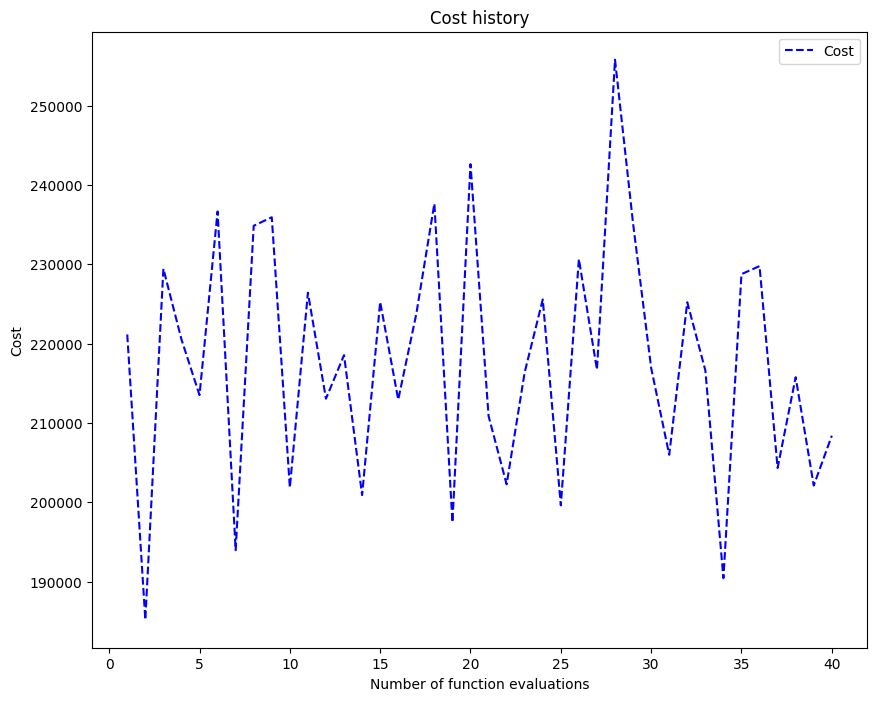

In [ ]:
q_std.result.plot_cost() ##PLOT OF STANDARD PARAMETRIZATION

#Extended parametrization
The ExtendedParams class implements the most general form of the QAOA where each operator in both the cost and mixer Hamiltonians has its own angle. For example, for a depth-1 (p=1) circuit the unitary operator corresponding to the QAOA circuit would now take the form:

$e^{i\sum_{j}\beta_{j}^{(1)}X_j}e^{-i\sum_{j\in s} \gamma_{j}^{(1)}h_{j}Z_j} e^{-(i/2)\sum_{j,k \in \Pi}\Gamma_{jk}^{(1)}g_{jk}Z_jZ_k}$

In [ ]:
device = create_device("local", 'qiskit.qasm_simulator')

q_extend= QAOA(device)
p=2
q_extend.set_circuit_properties(p=p, param_type='extended', init_type='ramp')
q_extend.set_classical_optimizer(maxiter=130)
q_extend.compile(ising_encoding)

In [ ]:
# run optimization
q_extend.optimize()
print("Optimized Hamiltonian cost with Extended Params:", q_extend.result.optimized['cost'])

Optimized Hamiltonian cost with Extended Params: 173870.3038149183


In [ ]:
pd.DataFrame(q_extend.result.lowest_cost_bitstrings(5))

,solutions_bitstrings,bitstrings_energies,probabilities
0,01000100100110000000,30.974422,0.01
1,00000001001000111000,82.967951,0.01
2,00001000101101001000,7150.455909,0.01
3,00000101100101000001,7183.255207,0.01
4,10001000011000000000,7197.380467,0.01


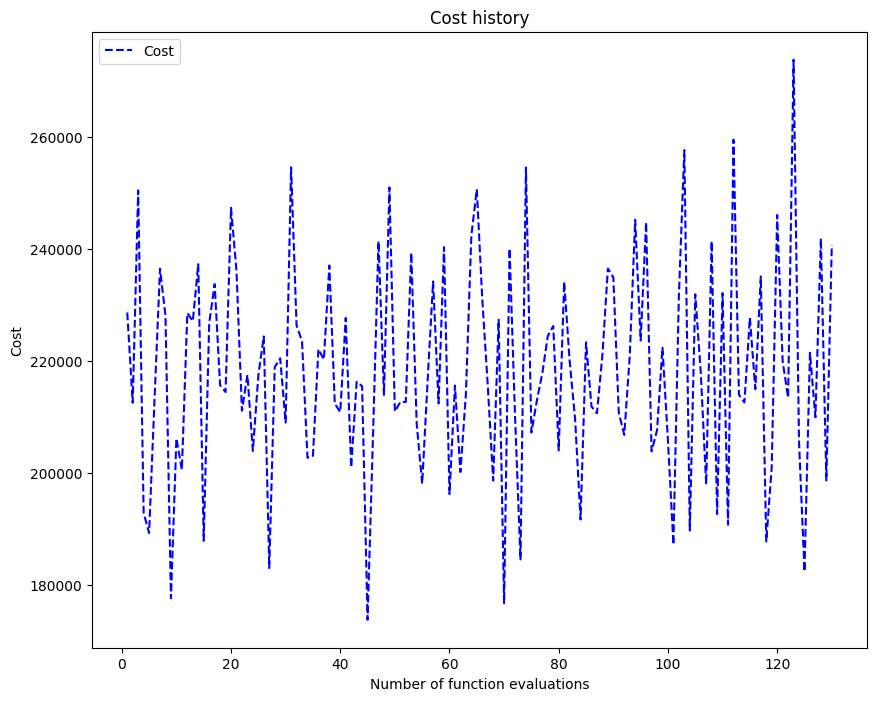

In [ ]:
q_extend.result.plot_cost() ##PLOT OF EXTENDED PARAMETRIZATION

#Annealing parametrization
The QAOAVariationalAnnealingParams class implements a discretised form of quantum annealing.

In quantum annealing, we start in the ground state of a mixer Hamiltonian,$H_M $
, and gradually evolve to the ground state of a cost Hamiltonian, $H_C$
, according to some annealing schedule function $s(t)$
, where $t$
 denotes time. If it were possible to perform the transformation infinitesimally slowly, we would be guaranteed to arrive at the exact ground state of the cost Hamiltonian. In practice, the transformation is performed over some finite time, and we hope to prepare the ground state of $H_C$
 with some acceptably high probability.

At any time $t$
 during the procedure, the instantaneous Hamiltonian is given by:
 $H(t) = \left(1 - s(t)\right)H_M + s(t)H_C$
 where $s(0) = 0$
, and $s(t = T) = 1$
, and $T$
 is the total annealing time.

In [ ]:
device = create_device("local", 'qiskit.qasm_simulator')
q_annealing = QAOA(device)
p=2
q_annealing.set_circuit_properties(p=p, param_type='annealing', init_type='ramp')
q_annealing.set_classical_optimizer(maxiter=40)
q_annealing.compile(ising_encoding)

In [ ]:
# run optimization
q_annealing.optimize()

print("Optimized HAMILTONIAN cost with AnnealingParams:", q_annealing.result.optimized['cost'])

Optimized HAMILTONIAN cost with AnnealingParams: 173568.879240601


In [ ]:
pd.DataFrame(q_annealing.result.lowest_cost_bitstrings(5))

,solutions_bitstrings,bitstrings_energies,probabilities
0,10011000000000010100,33.077903,0.01
1,01100010000000011000,50.675926,0.01
2,00110100000010100000,994.440441,0.01
3,10001000010100001100,7158.890082,0.01
4,01000111000100000100,7183.786695,0.01


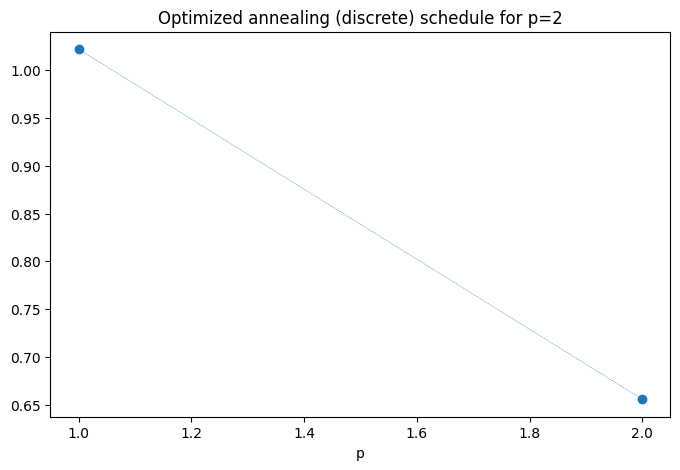

In [ ]:
# annealing optimized schedule
opt_schedule = q_annealing.result.optimized['angles']
p_i = range(1,p+1)
fig = plt.figure(figsize=(8,5))
plt.plot(p_i,opt_schedule,lw=0.3,ls='--',marker='o')
plt.xlabel('p')
plt.title(f'Optimized annealing (discrete) schedule for p={p}');

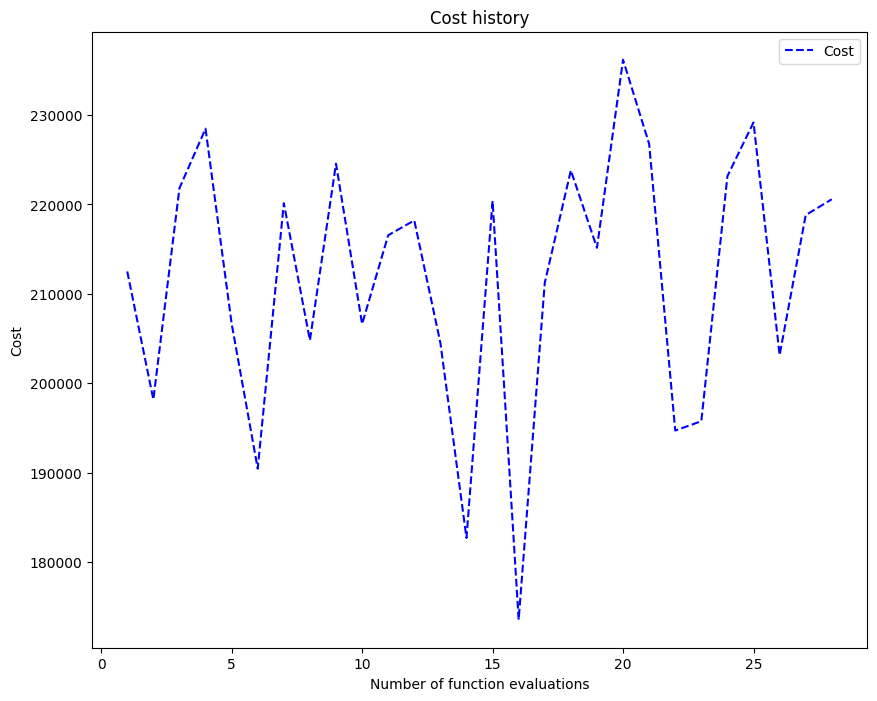

In [ ]:
q_annealing.result.plot_cost() #PLOT OF ANNEALING PARAMETRIZAATION

#Comparison with Standard parameterization

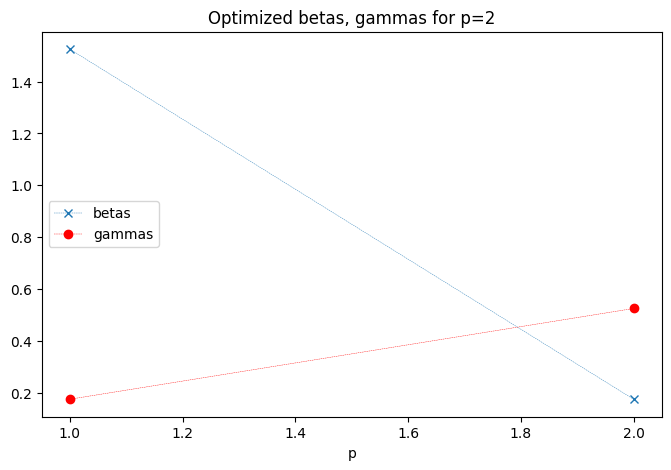

In [ ]:
# annealing optimized schedule

#Comparison with Standard parametrization
opt_angles = q_std.result.optimized['angles']
opt_betas = opt_angles[:p]
opt_gammas = opt_angles[p:]
fig = plt.figure(figsize=(8,5))
plt.plot(p_i,opt_betas,lw=0.3,ls='--',marker='x',label='betas')
plt.plot(p_i,opt_gammas,lw=0.3,ls='--',marker='o',label='gammas',color='red')
plt.xlabel('p')
plt.legend(loc='center left')
plt.title(f'Optimized betas, gammas for p={p}');

#FOURIER PARAMETRIZATION
The class QAOAVariationalFourierParams implements a heuristic proposed by Zhou et al. [1] which instead of optimizing for $\beta$
 and $\gamma$
 at each layer aims at finding the amplitudes of their discrete Fourier transforms given by:
 $\begin{equation}
\gamma_i^{(p)} = 2 \sum_{k=0}^{q-1} u_k \sin\left[(k+1/2)(i+1)\frac{\pi}{2p}\right] \tag{1}
\end{equation}$
$\begin{equation}
\beta_i^{(p)} = 2 \sum_{k=0}^{q-1} v_k \cos\left[(2k+1)i\frac{\pi}{2p}\right] \tag{2}
\end{equation}$

where $i = 0,...,p$

The idea comes from the empirical observation that the optimal parameters are often found to be smoothly varying functions for certain problems (such as the one implemented by the QAOAVariationalAnnealingParams class). Hence, it should be possible to use a reduced parameter set consisting of only the lowest $q$
 frequency components of those functions. Clearly, for $q\geq p$
 we have the full expressivity of the original parameter set (i.e. the $\beta$
 and $\gamma$
). In this parametrisation, for fixed $q$
, the optimisation problem therefore becomes that of finding the optimal Fourier components $v_k$
 and $u_k$
.

In [1], the authors show that certain variants of this basic Fourier parametrisation can perform significantly better than a randomised brute force search through parameter space, for MaxCut problems on 3-regular and 4-regular graphs.

In [ ]:
device = create_device("local", 'qiskit.qasm_simulator')
q_fourier = QAOA(device)
p=2
q=2
q_fourier.set_circuit_properties(p=p,q=q, param_type='fourier', init_type='ramp')
q_fourier.set_classical_optimizer(maxiter=40)
q_fourier.compile(ising_encoding)


In [ ]:
# run optimization
q_fourier.optimize()
pd.DataFrame(qaoa.result.lowest_cost_bitstrings(5))
print("Optimized HAMILTONIAN cost with FourierParams:",q_fourier.result.optimized['cost'])

Optimized HAMILTONIAN cost with FourierParams: 189308.35549743412


In [ ]:
pd.DataFrame(q_fourier.result.lowest_cost_bitstrings(5))

,solutions_bitstrings,bitstrings_energies,probabilities
0,00000100100000010101,79.673783,0.01
1,10000011110000000000,92.178464,0.01
2,10101000000000100100,508.171196,0.01
3,01010000111000001000,7152.405045,0.01
4,10000000110100000000,7154.166162,0.01


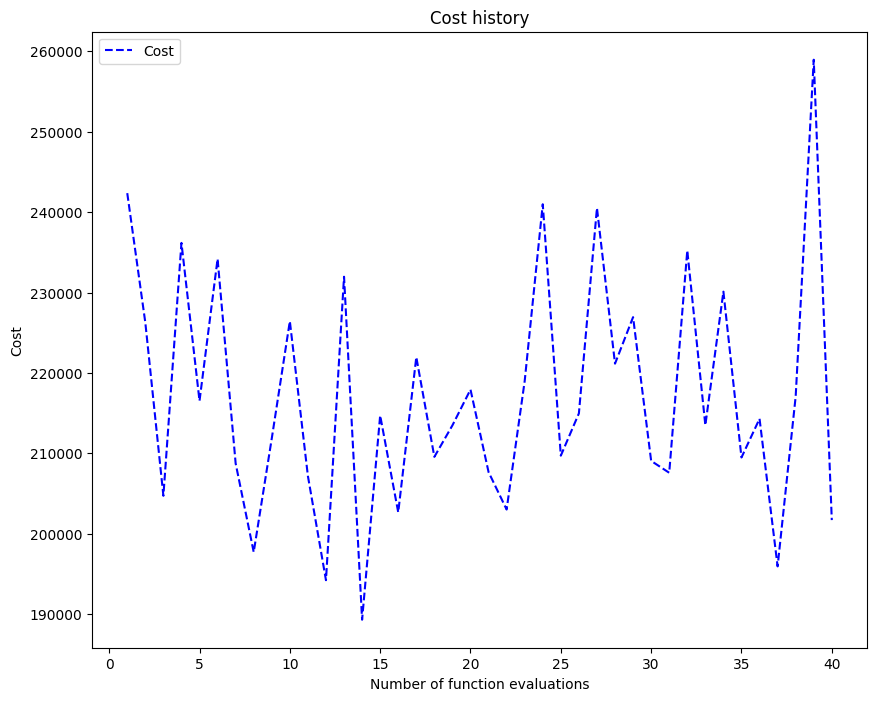

In [ ]:
q_fourier.result.plot_cost() ##PLOT OF FOURIER PARAMETRIZATION

#Noise Model
The optimal combination that you found with the best optimizer, the lowest number of
's and the correct answer, can give the same answer with noise, use the circuit with a noise model and identify if it gives the same answer.

In [ ]:
from qiskit import Aer
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import NoiseModel
from qiskit.providers.fake_provider import FakeVigo
from qiskit.providers.aer import QasmSimulator

In [ ]:
backend = FakeVigo()

device = QasmSimulator.from_backend(backend)
noise_model = NoiseModel.from_backend(device)


In [ ]:
q_noisy_shot = QAOA(device)

# device

qiskit_noisy_shot = create_device(location='local', name='qiskit.qasm_simulator')
q_noisy_shot.set_device(qiskit_noisy_shot)


# circuit properties
q_noisy_shot.set_circuit_properties(p=2, param_type='standard', init_type='ramp')

# backend properties
q_noisy_shot.set_backend_properties(n_shots = 40, noise_model = noise_model)

# classical optimizer properties
q_noisy_shot.set_classical_optimizer(method='COBYLA', maxiter=40, tol=0.001,
                                     cost_progress=True, parameter_log=True)

q_noisy_shot.compile(ising_encoding)

In [ ]:
# run optimization
q_noisy_shot.optimize()
results_noisy_shot = q_noisy_shot.result
print("Optimized HAMILTONIAN cost with Noise Model from Qiskit:",q_noisy_shot.result.optimized['cost'])


Optimized HAMILTONIAN cost with Noise Model from Qiskit: 161032.69674895811


In [ ]:

pd.DataFrame(q_noisy_shot.result.lowest_cost_bitstrings(5))

,solutions_bitstrings,bitstrings_energies,probabilities
0,00000001000010011001,102.507924,0.025
1,01101100001000000000,314.703753,0.025
2,10011010000100000010,7490.475918,0.025
3,00000000111001010110,28612.838182,0.025
4,00000100110110001001,28846.571154,0.025


THE RESULTS IN GRAPHICS ARE CONSISTENT BUT WE USE LESS DATA FOR SOME PARAMETRIZATIONS SINCE IT TOOK TOO MUCH TIME


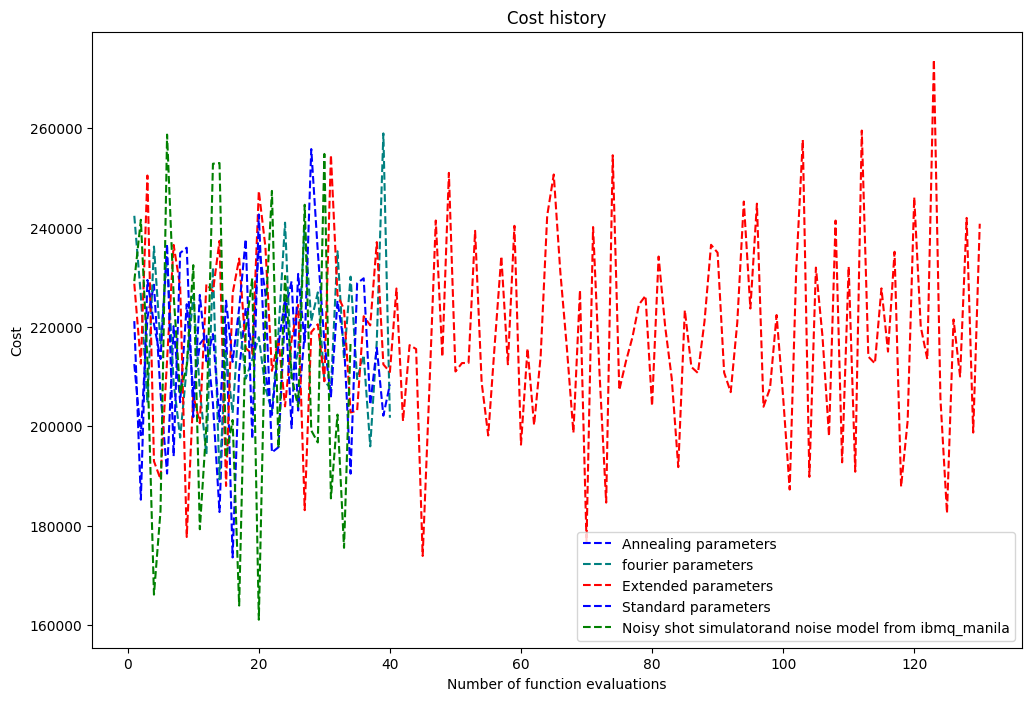

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,8))

q_annealing.result.plot_cost(ax=ax,label='Annealing parameters')
q_fourier.result.plot_cost(ax=ax,color='teal', label='fourier parameters  ')
q_extend.result.plot_cost(ax=ax,color='red', label='Extended parameters')
q_std.result.plot_cost(ax=ax,color='blue', label='Standard parameters')
results_noisy_shot.plot_cost(ax=ax,color='green', label='Noisy shot simulatorand noise model from ibmq_manila')

print("THE RESULTS IN GRAPHICS ARE CONSISTENT BUT WE USE LESS DATA FOR SOME PARAMETRIZATIONS SINCE IT TOOK TOO MUCH TIME")

References:

(1)E. Farhi, J. Goldstone, S. Gutmann (2014). A Quantum Approximate Optimization Algorithm, https://arxiv.org/abs/1411.4028.
(2)L. Zhou, S. Wang, S. Choi, H. Pichler, M. D. Lukin, Phys.Rev.X 10, 021067 (2020) Quantum Approximate Optimization Algorithm: Performance, Mechanism, and Implementation on Near-Term Devices, https://arxiv.org/abs/1812.01041.